In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline


In [3]:
train_data = pd.read_csv('../input/higgs-boson/training.zip')
test_data = pd.read_csv('../input/higgs-boson/test.zip')

In [4]:
train_data.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


In [5]:
test_data.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,350000,-999.000,79.589,23.916,3.036,-999.000,-999.000,-999.000,0.903,3.036,...,2.022,98.556,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-0.000
1,350001,106.398,67.490,87.949,49.994,-999.000,-999.000,-999.000,2.048,2.679,...,-1.138,176.251,1,47.575,-0.553,-0.849,-999.000,-999.000,-999.000,47.575
2,350002,117.794,56.226,96.358,4.137,-999.000,-999.000,-999.000,2.755,4.137,...,-1.868,111.505,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
3,350003,135.861,30.604,97.288,9.104,-999.000,-999.000,-999.000,2.811,9.104,...,1.172,164.707,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
4,350004,74.159,82.772,58.731,89.646,1.347,536.663,-0.339,1.028,77.213,...,-0.231,869.614,3,254.085,-1.013,-0.334,185.857,0.335,2.587,599.213


In [6]:
train_data.shape

(250000, 33)

In [7]:
test_data.shape

(550000, 31)

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   EventId                      250000 non-null  int64  
 1   DER_mass_MMC                 250000 non-null  float64
 2   DER_mass_transverse_met_lep  250000 non-null  float64
 3   DER_mass_vis                 250000 non-null  float64
 4   DER_pt_h                     250000 non-null  float64
 5   DER_deltaeta_jet_jet         250000 non-null  float64
 6   DER_mass_jet_jet             250000 non-null  float64
 7   DER_prodeta_jet_jet          250000 non-null  float64
 8   DER_deltar_tau_lep           250000 non-null  float64
 9   DER_pt_tot                   250000 non-null  float64
 10  DER_sum_pt                   250000 non-null  float64
 11  DER_pt_ratio_lep_tau         250000 non-null  float64
 12  DER_met_phi_centrality       250000 non-null  float64
 13 

In [9]:
train_data.describe()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,...,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,224999.500000,-49.023079,49.239819,81.181982,57.895962,-708.420675,-601.237051,-709.356603,2.373100,18.917332,...,209.797178,0.979176,-348.329567,-399.254314,-399.259788,-692.381204,-709.121609,-709.118631,73.064591,1.646767
std,72168.927986,406.345647,35.344886,40.828691,63.655682,454.480565,657.972302,453.019877,0.782911,22.273494,...,126.499506,0.977426,532.962789,489.338286,489.333883,479.875496,453.384624,453.389017,98.015662,1.875103
min,100000.000000,-999.000000,0.000000,6.329000,0.000000,-999.000000,-999.000000,-999.000000,0.208000,0.000000,...,13.678000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.001502
25%,162499.750000,78.100750,19.241000,59.388750,14.068750,-999.000000,-999.000000,-999.000000,1.810000,2.841000,...,123.017500,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.018636
50%,224999.500000,105.012000,46.524000,73.752000,38.467500,-999.000000,-999.000000,-999.000000,2.491500,12.315500,...,179.739000,1.000000,38.960000,-1.872000,-2.093000,-999.000000,-999.000000,-999.000000,40.512500,1.156188
75%,287499.250000,130.606250,73.598000,92.259000,79.169000,0.490000,83.446000,-4.593000,2.961000,27.591000,...,263.379250,2.000000,75.349000,0.433000,0.503000,33.703000,-2.457000,-2.275000,109.933750,2.404128
max,349999.000000,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.690000,5.684000,2834.999000,...,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000,7.822543


In [10]:
# DELETED WEIGHT BEACAUSE IT WAS NOT IN THE TESTING SET SO I DON'T WANT TO TRAIN THE MODEL ON THE TRAINING SET WHICH HAS
# AN EXTRA VARIABLE WHICH IS TO BE CONSIDERED BY THE ALGORITHMS

In [11]:
train_data = train_data.drop(['Weight'], axis = 1)

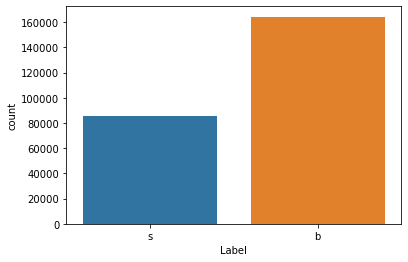

In [12]:
sns.countplot(train_data['Label'])

In [13]:
# GETTING THE DUMMY OF THE LABEL

In [14]:
dummy = pd.DataFrame()
dummy = pd.get_dummies(train_data['Label'], drop_first = True)
dummy

,s
0,1
1,0
2,0
3,0
4,0
...,...
249995,0
249996,0
249997,1
249998,0


In [15]:
train_data = pd.concat([train_data, dummy], axis = 1)

In [16]:
train_data = train_data.drop(['Label'], axis =1 )

In [17]:
train_data.shape

(250000, 32)

In [18]:
train_data.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,s
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,1
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,0
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,0
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,0
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,0


In [19]:
x = train_data.iloc[:, :-1]

x.shape

(250000, 31)

In [20]:
y = train_data.iloc[:, -1]
y.shape

(250000,)

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [23]:
# DATA PREPROCESSING IS ALWAYS NECESSARY SO THAT THE MODELS WOULD NOT HAVE TO WORRY ABT ANYTHING 
# WE MAY NOT ALSO RUN INTO ANY KERNEL RELATED ISSUES
# TIMING PROBLEM WOULDN'T HAPPEN( IT HAPPENED WITH ME SO AN ADVICE)
# ALWAYS PREPROCESS (I USED STANDARD SCALER), YOU CAN ALSO NORMALISE IT

In [24]:
from sklearn.preprocessing import StandardScaler, normalize


In [25]:
eventid_test = test_data.copy()

In [26]:
sc = StandardScaler()

test_data = sc.fit_transform(test_data)

In [27]:
test_data.shape

(550000, 31)

In [28]:

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [29]:
x_train.shape

(200000, 31)

In [30]:
x_train

array([[ 0.33286787,  0.37234274, -0.23698366, ...,  1.55879421,
         1.56870933,  1.53772449],
       [-1.17427658,  0.38665917, -0.48304797, ..., -0.63950315,
        -0.63950353, -0.74493581],
       [ 0.45260065, -2.33781464,  0.44545656, ..., -0.63950315,
        -0.63950353, -0.74493581],
       ...,
       [ 0.67587823,  0.42278981, -0.68419331, ..., -0.63950315,
        -0.63950353, -0.74493581],
       [-1.12750056,  0.35734962, -1.33379289, ...,  1.55966977,
         1.55799318,  1.57386938],
       [ 1.03144535,  0.39977723, -0.19916461, ..., -0.63950315,
        -0.63950353, -0.74493581]])

In [31]:
x_test

array([[ 0.21025231,  0.43595954,  0.7610208 , ..., -0.63950315,
        -0.63950353, -0.74493581],
       [-0.43202762, -2.33781464,  0.86596374, ..., -0.63950315,
        -0.63950353, -0.74493581],
       [ 0.77236851,  0.37632418,  0.32815242, ..., -0.63950315,
        -0.63950353, -0.18900936],
       ...,
       [-0.76248121,  0.3784773 , -0.55871437, ...,  1.5680858 ,
         1.569468  ,  1.77911495],
       [ 1.28334293,  0.39496161, -0.55715861, ..., -0.63950315,
        -0.63950353, -0.19927826],
       [-1.12621162,  0.24669384,  0.30272285, ..., -0.63950315,
        -0.63950353, -0.74493581]])

In [32]:
# Models I used 
# Logistic regression
# Random Forest
# Decision Tree
# XG BOOST

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
lr = LogisticRegression()

In [36]:

lr.fit(x_train, y_train)


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [37]:
lr_pred = lr.predict(x_test)


In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [39]:
accuracy_score(y_test, lr_pred)


0.7513

In [40]:
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82     32871
           1       0.67      0.54      0.60     17129

    accuracy                           0.75     50000
   macro avg       0.73      0.70      0.71     50000
weighted avg       0.74      0.75      0.74     50000



In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier



In [42]:
rf = RandomForestClassifier()

In [43]:
#I am doing this timing thing cz it was taking a lot of time before so just wanted to know the time, you know just for fun

In [44]:
import time
tic = time.time()

rf.fit(x_train, y_train)

toc = time.time()
print('time taken', (toc -  tic))

time taken 152.3696722984314


In [45]:
rf_pred = rf.predict(x_test)

In [46]:
rf.score(x_train, y_train)

0.99999

In [47]:
rf.score(x_test, y_test)

0.8393

In [48]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88     32871
           1       0.80      0.71      0.75     17129

    accuracy                           0.84     50000
   macro avg       0.83      0.81      0.82     50000
weighted avg       0.84      0.84      0.84     50000



In [49]:
dt = DecisionTreeClassifier()

In [50]:
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [51]:
dt_pred = dt.predict(x_test)

In [52]:
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82     32871
           1       0.65      0.66      0.66     17129

    accuracy                           0.76     50000
   macro avg       0.74      0.74      0.74     50000
weighted avg       0.77      0.76      0.76     50000



In [53]:
import xgboost
from xgboost import XGBClassifier



In [54]:
xg = XGBClassifier()


In [55]:
tic = time.time()

xg.fit(x_train, y_train)

toc = time.time()
print('time taken', (toc -  tic))

time taken 32.774362564086914


In [56]:
xg_pred = xg.predict(x_test)

In [57]:
print(classification_report(y_test, xg_pred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88     32871
           1       0.79      0.73      0.76     17129

    accuracy                           0.84     50000
   macro avg       0.83      0.81      0.82     50000
weighted avg       0.84      0.84      0.84     50000



In [58]:
xg.score(x_train, y_train)


0.862625

In [59]:
xg.score(x_test, y_test)

0.84074

In [60]:
accuracy_score(y_test, xg_pred)

0.84074

In [61]:
#I am gonna use the XG BOOST (based on how closeness)

In [62]:
tic = time.time()

final_pred = xg.predict(test_data)

toc = time.time()
print('time taken', (toc - tic))

time taken 2.436607599258423


In [63]:
final_pred


array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

In [64]:
final_pred.shape

(550000,)

In [65]:
# AS WE KNOW S IS 1 AND B IS 0 

In [66]:
final_pred = pd.DataFrame(final_pred)

In [67]:
final_pred.replace(to_replace = (0, 1), value = ('b', 's'), inplace = True)

In [68]:
final_pred

,0
0,b
1,b
2,s
3,s
4,b
...,...
549995,b
549996,b
549997,b
549998,b


In [69]:

pred = eventid_test['EventId'] #this is why I created a copy in cell 24

pred = pd.DataFrame(pred)
pred

,EventId
0,350000
1,350001
2,350002
3,350003
4,350004
...,...
549995,899995
549996,899996
549997,899997
549998,899998


In [70]:
final_pred.rename(columns = {0: 'Class'}, inplace = True)

In [71]:
# The RankOrder thing is the main reason for taking so much time in this poject
# thanks to the discusssion page

final_pred['RankOrder'] = final_pred['Class'].argsort().argsort() + 1  

In [72]:
final_pred = final_pred[['RankOrder', 'Class']]

In [73]:
final_pred

,RankOrder,Class
0,1,b
1,348129,b
2,399275,s
3,399272,s
4,348135,b
...,...,...
549995,151572,b
549996,151571,b
549997,151570,b
549998,100025,b


In [74]:
result = [pred, final_pred]


final_pred = pd.concat(result, axis =1)

In [75]:
final_pred

,EventId,RankOrder,Class
0,350000,1,b
1,350001,348129,b
2,350002,399275,s
3,350003,399272,s
4,350004,348135,b
...,...,...,...
549995,899995,151572,b
549996,899996,151571,b
549997,899997,151570,b
549998,899998,100025,b


In [76]:
# the weights for s are globally less than the weights for b

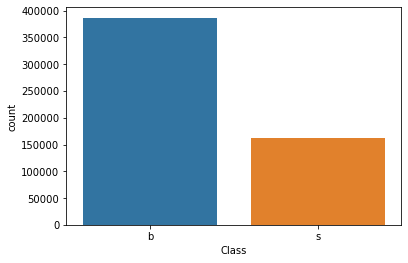

In [77]:

sns.countplot(final_pred['Class'])

In [78]:
final_pred['Class'].value_counts().index

Index(['b', 's'], dtype='object')

In [79]:
final_pred['Class'].value_counts().values

array([386943, 163057])

In [80]:
# NOW IT\S TIME TO SUBMIT 

final_pred.to_csv('submission2rf.csv')